In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import lmfit as lm
import scipy as sp
import corner
import emcee
import pandas as pd
from lc_lmfit import *

In [2]:
folder='afterglow_data/'
filename='_xray_batxrt.txt'

GRBs=['050724', '051227', '060614', '061006', '061210', '070714B', '071227', '080123', '080503', '111121A', '150424A', '211211A', '211227A']

### Extracting and Plotting Curves


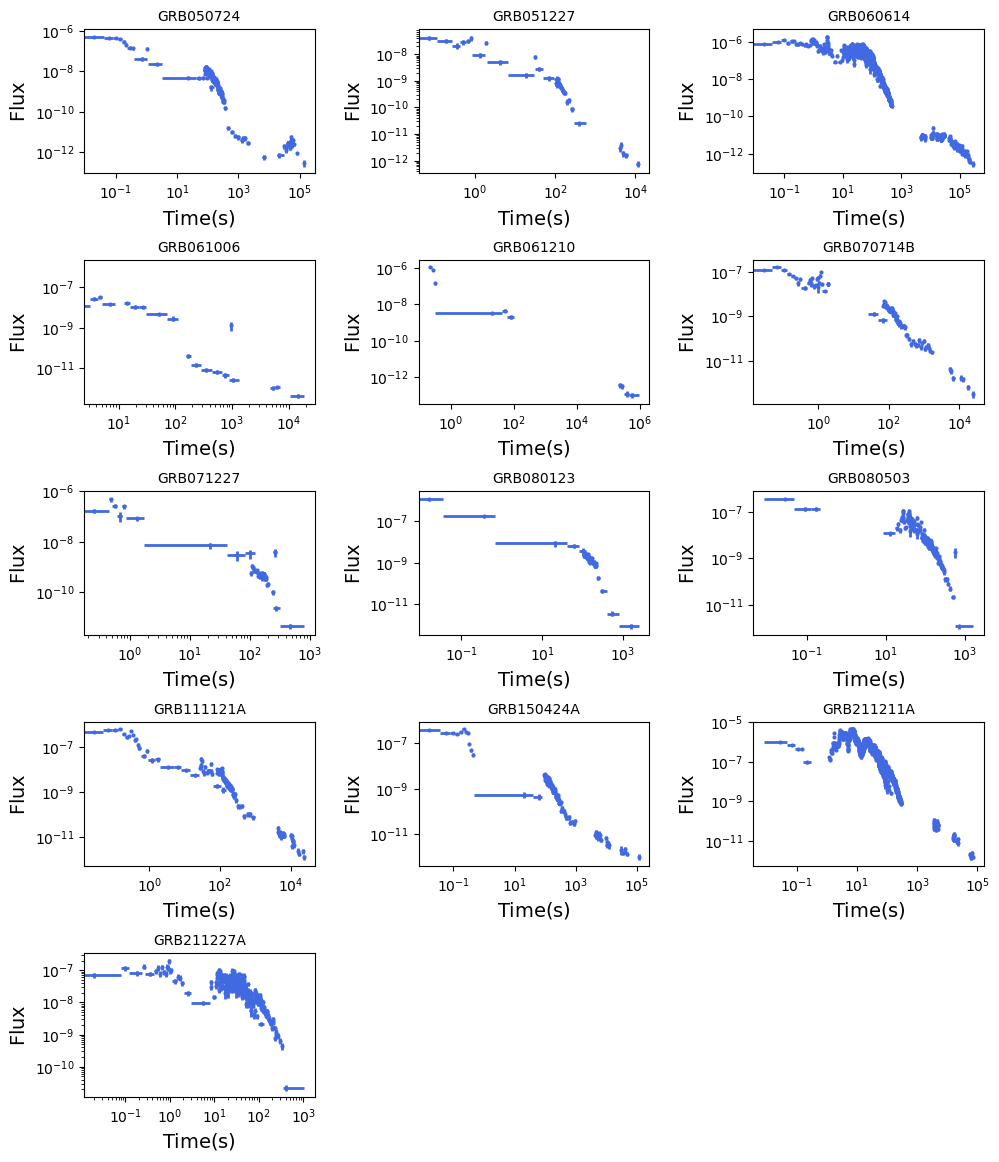

In [3]:
fig=plt.figure(figsize=(10.0,12.0), dpi=100)
fig.patch.set_facecolor('white')
plt.subplots_adjust(top=0.96, bottom=0.07, left=0.07, right=0.97, hspace=0.6,wspace=0.45)

for i in range(len(GRBs)):
    ax1 = fig.add_subplot(5,3, i+1)
    Time,Time_high,Time_low,Flux,Flux_high,Flux_low=get_individual_curves_log(folder+GRBs[i]+filename)
    ax1.errorbar(Time,Flux,xerr=[Time_low,Time_high],yerr=[Flux_low,Flux_high],fmt='.',color='royalblue',linewidth=2.0,markersize=4.0)
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    #ax1.set_xlim(1e1,1e5)
    #ax1.set_ylim(1e-14,1e-9)
    ax1.set_xlabel('$\mathrm{Time(s)}$',fontsize=14.)
    ax1.set_ylabel('$\mathrm{Flux}$',fontsize=14.)
    ax1.set_title("GRB"+GRBs[i],fontsize=10)

#xticks = ticker.LogLocator(numticks=4)
#ax1.xaxis.set_minor_locator(xticks)
#ax1.tick_params(axis='x', which='minor', labelsize=7.0)

plt.show()

### GRB i=4

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 25
    # data points      = 6
    # variables        = 2
    chi-square         = 5.66861716
    reduced chi-square = 1.41715429
    Akaike info crit   = 3.65911439
    Bayesian info crit = 3.24263333
[[Variables]]
    alpha_1:    1.01593672 +/- 0.05404618 (5.32%) (init = 3)
    amplitude:  8.9010e-08 +/- 3.8098e-08 (42.80%) (init = 8e-08)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, amplitude) = +0.8194


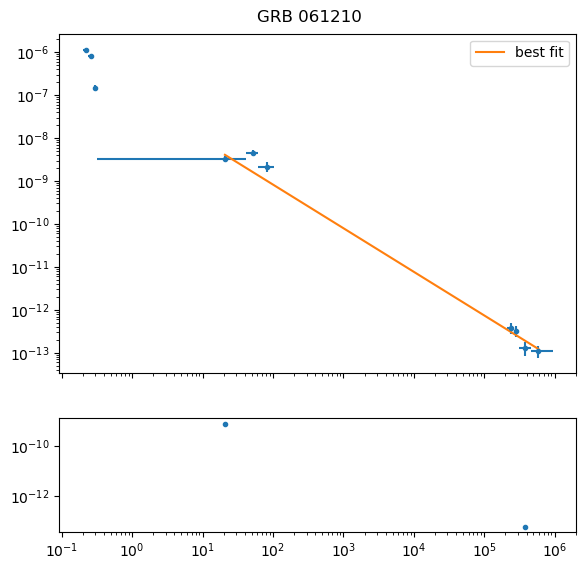

ee_start_index =  3
fit_end_index =  9
best_fit = {'alpha_1': 1.0159367174781455, 'amplitude': 8.901011473809321e-08}


name,value,standard error,relative error,initial value,min,max,vary
alpha_1,1.01593672,0.05404618,(5.32%),3,0.00000000,10.0000000,True
amplitude,8.9010e-08,3.8098e-08,(42.80%),8e-08,1.0000e-10,1.0000e-07,True


In [4]:
i=4
#power law
time,time_high,time_low,flux,flux_high,flux_low =get_individual_curves_log(folder+GRBs[i]+filename)
flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 2)[0][0]
fit_end_index = np.where(time <  1e6)[0][-1]


params=lm.Parameters()
params.add("alpha_1", min = 0, max = 10.0, value = 3)
params.add("amplitude", min = 1e-10, max = 1e-7, value = 8e-8)

minner = lm.Minimizer(cost_func_pl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index]))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = power_law(time[ee_start_index:fit_end_index], result.params['alpha_1'], result.params['amplitude']) - flux[ee_start_index:fit_end_index]
x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = power_law(x, result.params['alpha_1'], result.params['amplitude'])  

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, y,label ='best fit')
# ax1.loglog(x,power_law(x,1, 1e-8),label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')
plt.subplots_adjust(top=0.94)
plt.suptitle("GRB "+GRBs[i])
plt.show()

print("ee_start_index = ", ee_start_index)
print("fit_end_index = ", fit_end_index)
print("best_fit =", result.params.valuesdict())

result.params

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 209
    # data points      = 9
    # variables        = 6
    chi-square         = 12.6492208
    reduced chi-square = 4.21640694
    Akaike info crit   = 15.0633394
    Bayesian info crit = 16.2466868
[[Variables]]
    tb0:        0.58364073 +/- 0.39105467 (67.00%) (init = 0.1)
    tb1:       100.0000000 +/- 2997.65183 (2997.65%) (init = 70)
    alpha_0:    5.32597133 +/- 1.57781285 (29.62%) (init = 3)
    alpha_1:    0.17671225 +/- 0.74580446 (422.04%) (init = 0.5)
    alpha_2:    1.16510985 +/- 3.67788369 (315.67%) (init = 3)
    amplitude:  6.6185e-09 +/- 2.1486e-08 (324.64%) (init = 8e-08)
[[Correlations]] (unreported correlations are < 0.100)
    C(tb1, alpha_2)       = +0.9993
    C(alpha_1, amplitude) = +0.9889
    C(tb0, amplitude)     = -0.9158
    C(tb0, alpha_1)       = -0.8997
    C(tb0, alpha_0)       = -0.4119


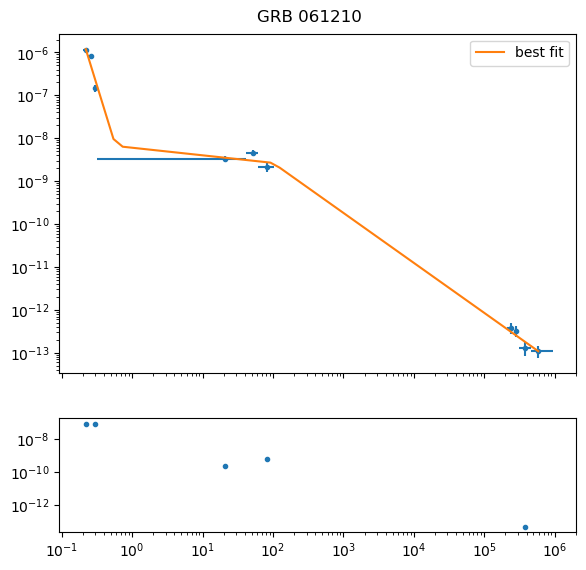

name,value,standard error,relative error,initial value,min,max,vary
tb0,0.58364073,0.39105467,(67.00%),0.1,0.00000000,1.00000000,True
tb1,100.0000000,2997.65183,(2997.65%),70,50.0000000,100.000000,True
alpha_0,5.32597133,1.57781285,(29.62%),3,0.00000000,10.0000000,True
alpha_1,0.17671225,0.74580446,(422.04%),0.5,0.00000000,10.0000000,True
alpha_2,1.16510985,3.67788369,(315.67%),3,0.00000000,10.0000000,True
amplitude,6.6185e-09,2.1486e-08,(324.64%),8e-08,1.0000e-10,1.0000e-07,True


In [5]:
i=4
n=3
time,time_high,time_low,flux,flux_high,flux_low =get_individual_curves_log(folder+GRBs[i]+filename)
flux_err = flux_high + flux_low
time_err = time_high + time_low

ee_start_index = np.where(time > 0)[0][0]
fit_end_index = np.where(time <  1e6)[0][-1]


params=lm.Parameters()
params.add("tb0", min = 0, max = 1, value = 0.1)
params.add("tb1", min = 50, max = 100, value = 70)
params.add("alpha_0", min = 0, max = 10.0, value = 3)
params.add("alpha_1", min = 0, max = 10.0, value = 0.5)
params.add("alpha_2", min = 0, max = 10.0, value = 3)
params.add("amplitude", min = 1e-10, max = 1e-7, value = 8e-8)

minner = lm.Minimizer(cost_func_nbpl, params, fcn_args=(time[ee_start_index:fit_end_index], flux[ee_start_index:fit_end_index], time_err[ee_start_index:fit_end_index], flux_err[ee_start_index:fit_end_index], n))
result = minner.minimize(method="least_squares")
lm.printfuncs.report_fit(result)

residuals = get_y(result, n, time[ee_start_index:fit_end_index]) - flux[ee_start_index:fit_end_index]
x=np.geomspace(time[ee_start_index], time[fit_end_index])
y = get_y(result, n, x)

fig, (ax1, ax2) = plt.subplots(2, figsize=(20/3, 6), height_ratios=[3,1], sharex=True)
ax1.errorbar(time, flux, fmt='.', xerr=[time_low,time_high],yerr=[flux_low,flux_high])
ax1.loglog(x, get_y(result, n, x),label ='best fit', zorder=10)
# ax1.loglog(x,nbroken_law(x,[0.6, 74], [4, 0, 4], 5e-8), '.', label ='guess')
ax1.legend()
ax2.loglog(time[ee_start_index:fit_end_index],residuals, '.')
plt.subplots_adjust(top=0.94)
plt.suptitle("GRB "+GRBs[i])
plt.show()


result.params

In [6]:
print("ee_start_index = ", ee_start_index)
print("fit_end_index = ", fit_end_index)
print("best_fit =", result.params.valuesdict())
standard_errors_dict = {param.name+"_err": param.stderr for param in result.params.values()}
print("errors =", standard_errors_dict)

ee_start_index =  0
fit_end_index =  9
best_fit = {'tb0': 0.5836407289746429, 'tb1': 99.99999999999979, 'alpha_0': 5.325971326934093, 'alpha_1': 0.1767122521113937, 'alpha_2': 1.1651098501270394, 'amplitude': 6.618473544957354e-09}
errors = {'tb0_err': 0.39105466797872046, 'tb1_err': 2997.6518348889126, 'alpha_0_err': 1.5778128487728165, 'alpha_1_err': 0.7458044607847443, 'alpha_2_err': 3.677883690355632, 'amplitude_err': 2.1486228435268508e-08}
